<a href="https://colab.research.google.com/github/ShivanshGupta55/News_Headlines_Is_Sarcastic/blob/master/Is_Sarcastic%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
#Downloading Dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-03-24 07:56:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 2607:f8b0:4004:811::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-03-24 07:56:19 (158 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json
with open("/tmp/sarcasm.json",'r') as f:
  datastore =  json.load(f)

In [0]:
#Extracting features and labels
sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
#Separating training and test data
import numpy as np
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

In [0]:
#initializing variables
vocab_size = 10000
embed_dim = 16
max_length = 120
padding_type = 'post' 
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = np.array(pad_sequences(training_sequences, maxlen = max_length, truncating = trunc_type, padding=padding_type))

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = np.array(pad_sequences(testing_sequences, maxlen = max_length, truncating=trunc_type, padding=padding_type))

In [32]:
#Define model
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embed_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [33]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data = (testing_padded,testing_labels), verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 - 4s - loss: 0.6818 - acc: 0.5580 - val_loss: 0.6595 - val_acc: 0.6005
Epoch 2/10
20000/20000 - 4s - loss: 0.5172 - acc: 0.7692 - val_loss: 0.4180 - val_acc: 0.8259
Epoch 3/10
20000/20000 - 3s - loss: 0.3454 - acc: 0.8611 - val_loss: 0.3652 - val_acc: 0.8462
Epoch 4/10
20000/20000 - 3s - loss: 0.2882 - acc: 0.8855 - val_loss: 0.3499 - val_acc: 0.8515
Epoch 5/10
20000/20000 - 4s - loss: 0.2496 - acc: 0.9023 - val_loss: 0.3473 - val_acc: 0.8469
Epoch 6/10
20000/20000 - 4s - loss: 0.2227 - acc: 0.9128 - val_loss: 0.3530 - val_acc: 0.8504
Epoch 7/10
20000/20000 - 3s - loss: 0.1995 - acc: 0.9226 - val_loss: 0.3464 - val_acc: 0.8556
Epoch 8/10
20000/20000 - 4s - loss: 0.1794 - acc: 0.9324 - val_loss: 0.3550 - val_acc: 0.8556
Epoch 9/10
20000/20000 - 4s - loss: 0.1630 - acc: 0.9384 - val_loss: 0.3663 - val_acc: 0.8544
Epoch 10/10
20000/20000 - 3s - loss: 0.1489 - acc: 0.9452 - val_loss: 0.3835 - val_acc: 0.8514


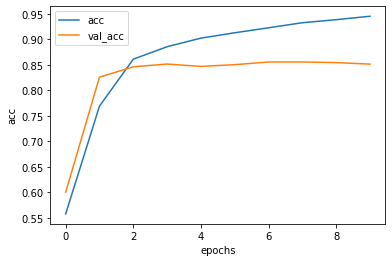

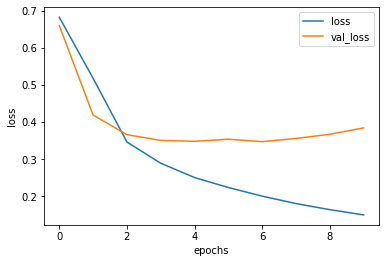

In [34]:
#Visualizing 
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "acc")
plot_graphs(history, "loss")


In [35]:
#Define model with LSTM
model2 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embed_dim, input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(24, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])
model2.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_12 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [36]:
history2 = model2.fit(training_padded, training_labels, epochs=num_epochs, validation_data = (testing_padded,testing_labels), verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 - 280s - loss: 0.4127 - acc: 0.7954 - val_loss: 0.3314 - val_acc: 0.8591
Epoch 2/10
20000/20000 - 280s - loss: 0.2260 - acc: 0.9078 - val_loss: 0.3496 - val_acc: 0.8560
Epoch 3/10
20000/20000 - 279s - loss: 0.1618 - acc: 0.9384 - val_loss: 0.4032 - val_acc: 0.8483
Epoch 4/10
20000/20000 - 282s - loss: 0.1092 - acc: 0.9609 - val_loss: 0.4874 - val_acc: 0.8432
Epoch 5/10
20000/20000 - 284s - loss: 0.0704 - acc: 0.9761 - val_loss: 0.5392 - val_acc: 0.8447
Epoch 6/10
20000/20000 - 289s - loss: 0.0429 - acc: 0.9857 - val_loss: 0.7151 - val_acc: 0.8386
Epoch 7/10
20000/20000 - 289s - loss: 0.0305 - acc: 0.9904 - val_loss: 0.7351 - val_acc: 0.8374
Epoch 8/10
20000/20000 - 279s - loss: 0.0213 - acc: 0.9931 - val_loss: 0.8669 - val_acc: 0.8347
Epoch 9/10
20000/20000 - 273s - loss: 0.0167 - acc: 0.9946 - val_loss: 1.0149 - val_acc: 0.8314
Epoch 10/10
20000/20000 - 287s - loss: 0.0120 - acc: 0.9961 - val_loss: 1.0472 - val_ac

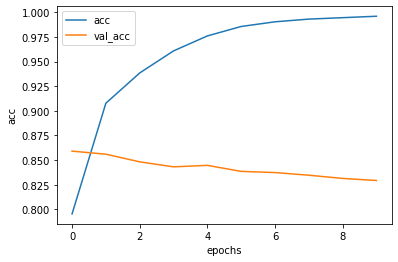

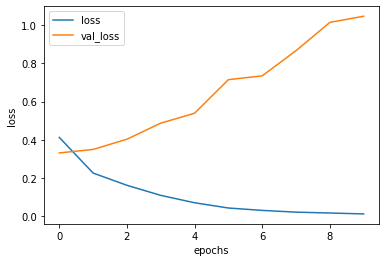

In [37]:
plot_graphs(history2, "acc")
plot_graphs(history2, "loss")

In [38]:
#Define model with Convolution
model3 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embed_dim, input_length = max_length),
                             tf.keras.layers.Conv1D(128,5, activation='relu'),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(24, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])
model3.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
_________________________________________________________________


In [39]:
history3 = model3.fit(training_padded, training_labels, epochs=num_epochs, validation_data = (testing_padded,testing_labels), verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 - 9s - loss: 0.4373 - acc: 0.7825 - val_loss: 0.3522 - val_acc: 0.8460
Epoch 2/10
20000/20000 - 4s - loss: 0.2249 - acc: 0.9127 - val_loss: 0.3658 - val_acc: 0.8474
Epoch 3/10
20000/20000 - 4s - loss: 0.1158 - acc: 0.9582 - val_loss: 0.4415 - val_acc: 0.8416
Epoch 4/10
20000/20000 - 4s - loss: 0.0444 - acc: 0.9868 - val_loss: 0.5775 - val_acc: 0.8377
Epoch 5/10
20000/20000 - 4s - loss: 0.0144 - acc: 0.9961 - val_loss: 0.6961 - val_acc: 0.8393
Epoch 6/10
20000/20000 - 4s - loss: 0.0048 - acc: 0.9990 - val_loss: 0.8006 - val_acc: 0.8401
Epoch 7/10
20000/20000 - 4s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.8832 - val_acc: 0.8392
Epoch 8/10
20000/20000 - 4s - loss: 0.0012 - acc: 0.9998 - val_loss: 0.9665 - val_acc: 0.8423
Epoch 9/10
20000/20000 - 4s - loss: 0.0011 - acc: 0.9995 - val_loss: 1.0240 - val_acc: 0.8411
Epoch 10/10
20000/20000 - 4s - loss: 0.0014 - acc: 0.9995 - val_loss: 1.1046 - val_acc: 0.8386


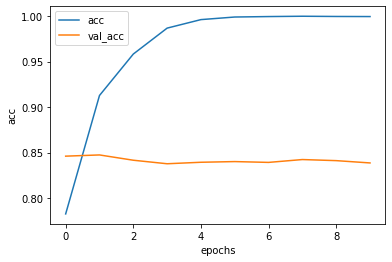

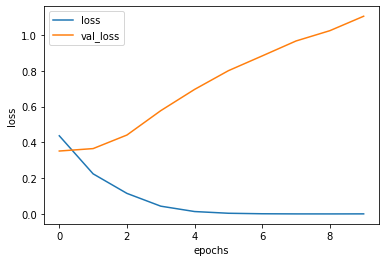

In [40]:
plot_graphs(history3, "acc")
plot_graphs(history3, "loss")